<a href="https://colab.research.google.com/github/allegheny-college-cmpsc-101-fall-2023/course-materials/blob/main/Notes/Templates/Template_CMPSC101_F2023_searching_sorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quick Recap Big O

## Abstraction of Speed

<img src="https://s3.amazonaws.com/lowres.cartoonstock.com/animals-tortoise-turtles-hare_and_tortoise-fables-racing-mbcn519_low.jpg" />

## Big O

### Plot

(0.0, 100.0)

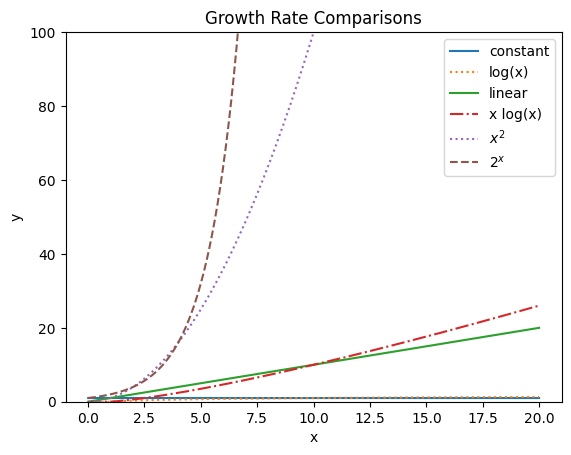

In [ ]:
import matplotlib.pyplot as plt
import math

fs = 100
dur = 20
x = [i/fs for i in range(1,dur*fs)]
plt.plot(x,[1 for i in x], label = "constant")
plt.plot(x,[math.log10(i) for i in x], ':', label = "log(x)");
plt.plot(x,x, label = "linear");
plt.plot(x,[i*math.log10(i) for i in x], '-.',  label = "x log(x)")
plt.plot(x,[i**2 for i in x], ':', label = "$x^2$");
plt.plot(x,[2**i for i in x], '--', label = "$2^x$");
plt.legend();
plt.xlabel("x")
plt.ylabel("y")
plt.title("Growth Rate Comparisons")

plt.ylim(0,100)

### O(n)

In [ ]:
# Searching for element in a list

def linear_search0(input_list: list, e) -> bool:
  for element in input_list:
    if element == e:
      return True
  return False

In [ ]:
# Searching for element in a list

def linear_search1(input_list: list, e) -> bool:
  for i in range(len(input_list)):
    if input_list[i] == e:
      return True
  return False

In [ ]:
# Searching for element in a list

def linear_search2(input_list: list, e) -> bool:
  for i in range(len(input_list)):
    current_element = input_list[i]
    if current_element == e:
      return True
  return False


In [ ]:
# Searching for element in a list

def linear_search3(input_list: list, e) -> bool:
  list_len = len(input_list)
  for i in range(list_len):
    current_element = input_list[i]
    if current_element == e:
      return True
  return False

In [ ]:
list_size = 10000000
elem = list_size-1
print(f"linear_search3([i for i in range({list_size})], {elem})", linear_search3([i for i in range(list_size)], elem))

- above you can see the algorithms vary slightly
  - can you spot the differences?
  - what here would be the "size of the input"
  - and which version of this function has the most steps per element in the input?
  - what would be the big o notation for the last one?, and the first one?

## Bisection Search

[ref](https://www.khanacademy.org/computing/computer-science/algorithms/binary-search/a/implementing-binary-search-of-an-array)
</br>
<img src="https://cdn.kastatic.org/ka-perseus-images/bbb5cf3c0a28aee1a1961ee8b23800ed531953af.png" />
</br>
<img src="https://cdn.kastatic.org/ka-perseus-images/b63e2970131ee28a7eb45299151731effe5c0c3e.png" />
</br>
<img src="https://cdn.kastatic.org/ka-perseus-images/4c9fbfe50c5a4c6df7a4653c16c20e11b3dd9b7a.png" />



### bisect_search1

In [ ]:
# Recursive Search Example

def bisect_search1(mylist, e):
  """Determine if e is in L."""
  if mylist == []:
    return False
  elif len(mylist) == 1:
    return mylist[0] == e
  else:
    midpoint = len(mylist)//2
    if mylist[midpoint] > e:
      return bisect_search1(mylist[:midpoint], e)
    else:
      return bisect_search1(mylist[midpoint:], e)

list_size = 10000000
elem = list_size-1
print(f"bisect_search1([i for i in range({list_size})], {elem})", bisect_search1([i for i in range(list_size)], elem))

### bisect_search2

In [ ]:
def bisect_search2(mylist, e):

  def bisect_search_helper(mylist, e, start, end):
    """Determine if e is in L."""
    if start == end:
      return mylist[start] == e
    else:
      midpoint = (end+start)//2
      if mylist[midpoint] == e:
        return True
      if mylist[midpoint] > e:
        end = midpoint - 1
        if end >= start:
          return bisect_search_helper(mylist, e, start, end)
      else:
        start = midpoint + 1
        if start <= end:
          return bisect_search_helper(mylist, e, start, end)
      return False


  if len(mylist) == 0:
    return False
  return bisect_search_helper(mylist, e, start = 0, end = len(mylist) -1)



## Complexity Intuitions

- When an algorithm reduces the problem by one each time, it is linear
  - often happens in a single for loop
- when an algorithm reduces a problem in half, or in thirds, or in fourths, or in 10ths each time, that is logarithic complexity
- When there are nested loops, often that is an indication of a polynomial complexity $O(n^2)$
- Exponential complexity - typically occurs when there are multiple recursive calls inside a function that _all_ get excecuted
  - can you think of an algorithm we have studied that did this? [hint](https://stackoverflow.com/questions/360748/computational-complexity-of-fibonacci-sequence)

# Sorting
- [Lecture Video On Same Topic](https://ocw.mit.edu/courses/6-0001-introduction-to-computer-science-and-programming-in-python-fall-2016/resources/lecture-12-searching-and-sorting/)
- https://realpython.com/sorting-algorithms-python/ for next Engineering Effort


- how does one sort a list as efficiently as possible?
- can you think of how you would instruct a computer to sort?

## Bubble Sort

### large numbers bubble up

<img src="https://upload.wikimedia.org/wikipedia/commons/3/37/Bubble_sort_animation.gif" />

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Bubble-sort-example-300px.gif?20131109191607" />

### Pseudo code

- consider a pair of elements (element i and i+1)
- compare them
- swap if necessary so they are in order
- repeat on the next pair of element (element i+1 and i+2) until end of list is reached
- restart at the beginning, but we can be assured that the last element is the largest
  - first pass, the largest element ends up at the end of the list
  - next pass, the next largest element ends up at the next to last slot

- only conclude that the list is sorted if NO swaps are needed (or if we know that every element above has already been sorted)

In [ ]:
def bubble_sort(array: list[int]) -> None:
  swap = True
  while swap:
    swap = False
    for i in range(len(array) - 1):
      if array[i+1] < array[i]:
        swap = True
        temp = array[i]
        array[i] = array[i+1]
        array[i+1] = temp

array = [-10, -100, 100, 1, 5, 3, 8, 2, -1]
bubble_sort(array)
print(array)


# What is the complexity?

Check out bubble sort from Proactive Programmers - https://colab.research.google.com/github/ProactiveProgrammers/www.proactiveprogrammers.com/blob/master/files/data-abstraction/data-structures/use-searching-and-sorting.ipynb#scrollTo=BgbHsFtDj6OZ  

## Selection Sort

### Smallest number is selected and placed toward front [eg](https://upload.wikimedia.org/wikipedia/commons/f/f6/Selection_Sort_Animation.gif)

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f6/Selection_Sort_Animation.gif"/>

<img src="https://upload.wikimedia.org/wikipedia/commons/9/94/Selection-Sort-Animation.gif" />

### Pseudo Code

- find smallest element by linear pass through entire list
- move that element to the beginning
- repeat by searching for the next smallest element, then move that to the beginning + 1
- The front (prefix) is always assumed to be sorted, and the back (suffix) is assumed to have only elements that are larger than inside the prefix
- each time through the list, the prefix grows, and the suffix shrinks

In [ ]:
def select_sort(array: list[int]) -> None:
  ixd_end_prefix = 0
  while ixd_end_prefix != len(array):
    for i in range(ixd_end_prefix, len(array)):
      if array[i] < array[ixd_end_prefix]:
        temp = array[ixd_end_prefix]
        array[ixd_end_prefix] = array[i]
        array[i] = temp
    ixd_end_prefix += 1

array = [-10, -100, 100, 1, 5, 3, 8, 2, -1]
select_sort(array)
print(array)

# What is the complexity?


[-100, -10, -1, 1, 2, 3, 5, 8, 100]


## Insert Sort

### Animation

<img src="https://upload.wikimedia.org/wikipedia/commons/2/25/Insertion_sort_animation.gif?20070313104417" />

## Merge Sort

### [Animation 1](https://upload.wikimedia.org/wikipedia/commons/c/c5/Merge_sort_animation2.gif)

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c5/Merge_sort_animation2.gif" />

### [Animation 2](https://miro.medium.com/v2/0*K7cD17vfL7FdTTLK.gif)

<img src="https://miro.medium.com/v2/0*K7cD17vfL7FdTTLK.gif" />

## Questions

- does it make sense to always sort a list before searching?
- how can the cost be amortized?